### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

### Reading the data

In [2]:
data = pd.read_csv('AirQuality.csv',sep=';')

data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


### Exploratory Data Analysis

In [5]:
data.drop(['Unnamed: 15','Unnamed: 16'],axis=1,inplace=True)

In [9]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [11]:
data.shape

(9471, 15)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


#### Replacing the commas in the data and changing it to float values

In [16]:
data.iloc[:,2] = data.iloc[:,2].replace(',','.',regex=True)
data.iloc[:,5] = data.iloc[:,5].replace(',','.',regex=True)
data.iloc[:,12] = data.iloc[:,12].replace(',','.',regex=True)
data.iloc[:,13] = data.iloc[:,13].replace(',','.',regex=True)
data.iloc[:,14] = data.iloc[:,14].replace(',','.',regex=True)

In [18]:
data = data.astype({'CO(GT)':'float64',
             'C6H6(GT)':'float64',
             'T':'float64',
             'RH':'float64',
             'AH':'float64'})

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [22]:
data.drop(['Date','Time'],axis=1,inplace=True)

In [24]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


#### Handling null values and duplicates in the data

In [27]:
data.isnull().sum()

CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [29]:
data.dropna(inplace=True)

In [31]:
data.shape

(9357, 13)

In [33]:
data.duplicated().sum()

31

In [35]:
data.drop_duplicates(inplace=True,ignore_index=True)

In [37]:
data.shape

(9326, 13)

#### Handling Outilers of the data

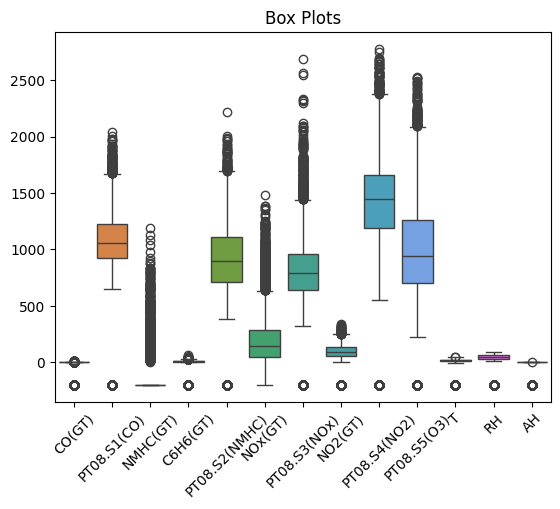

In [40]:
sns.boxplot(data)
plt.xticks(rotation=45)
plt.title('Box Plots');

In [41]:
def remove_outliers(data,column,lower=0.01,upper=0.99):
    lower_bound = data[column].quantile(lower)
    upper_bound = data[column].quantile(upper)

    cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    outliers = data[(data[column] <= lower_bound) | (data[column] >= upper_bound)]

    return cleaned_data,outliers

In [44]:
df = data.copy()

all_outliers = {}

for i in data.columns:
    cleaned_data,outliers = remove_outliers(df,i)

    df = cleaned_data
    all_outliers[i] = outliers

In [46]:
df = df.reset_index().drop('index',axis=1)

In [48]:
df.shape

(8191, 13)

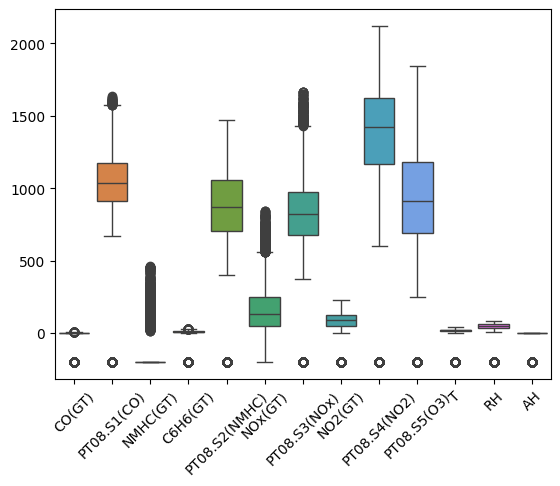

In [50]:
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

##### As the data mostly consists of outliers, I removed those upto some extent i.e., I removed those data points which lies above 99% quantile and below 1% quantile.

#### Handling skewness of the data

In [54]:
#df.skew()

In [56]:
X = df.copy()

In [58]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

X = pd.DataFrame(pt.fit_transform(X),columns=X.columns)

In [ ]:
#X.skew()

In [ ]:
#def compare_kde(column):
    #plt.figure(figsize=(12,4))

    #plt.subplot(1,2,1)
    #df[column].plot(kind='kde')
    #plt.title(column)
    #plt.xlabel(column)

    #plt.subplot(1,2,2)
    #X[column].plot(kind='kde')
   #plt.title(column)
    #plt.xlabel(column)

    #plt.show()

In [ ]:
#for i in df.columns:
    #compare_kde(i)

In [ ]:
#plt.figure(figsize=(12,12))
#sns.heatmap(X.corr(),annot=True)
#plt.show()

##### From the above heatmap, there is a huge impact of PT08.S4(NO2), Temperature, PT08.S1(NMHC), PT08.S1(CO), C6H6(GT)

In [60]:
def scatter_plot_AH(column):
    plt.scatter(X[column],X['AH'])
    plt.xlabel(column)
    plt.ylabel('Absolute Humidity')
    plt.title(f'{column} vs Relative Humidity')
    plt.show()

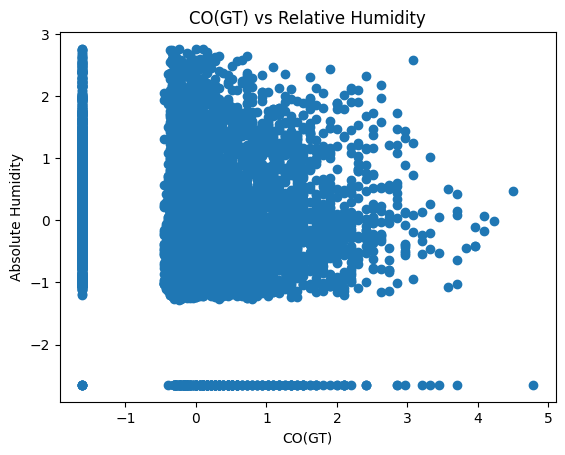

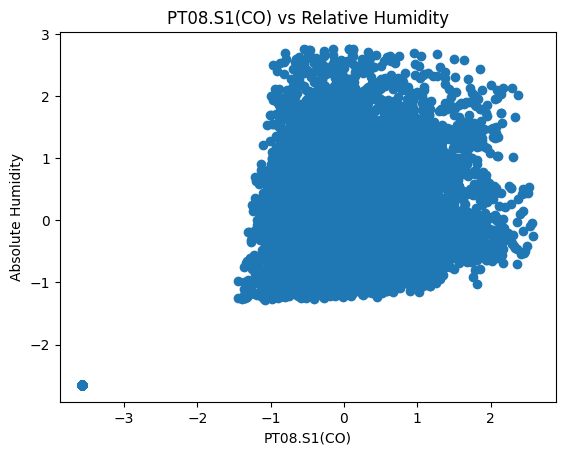

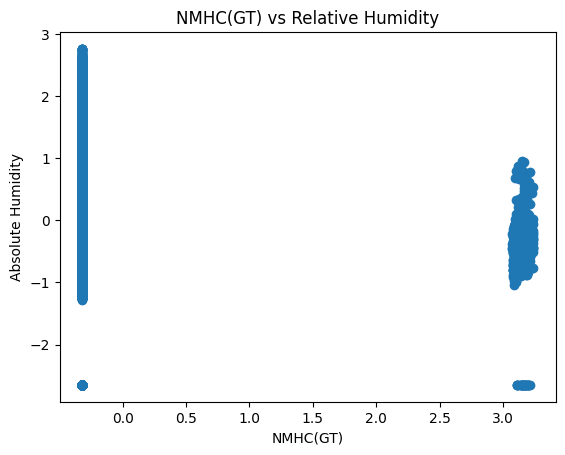

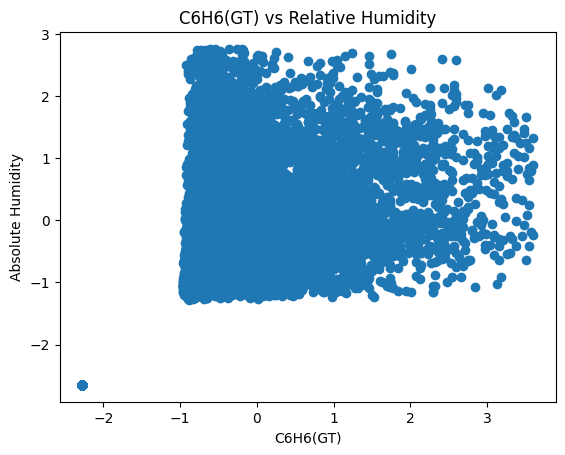

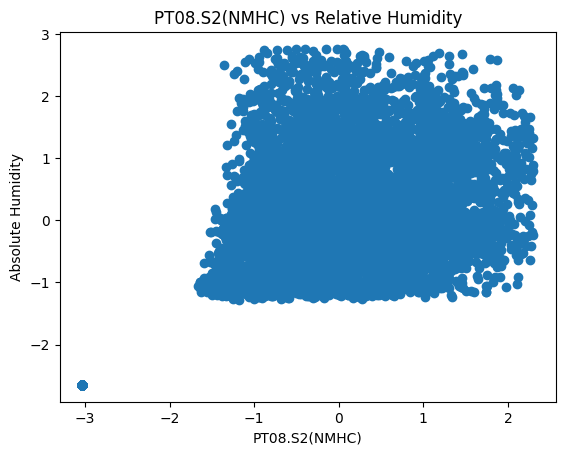

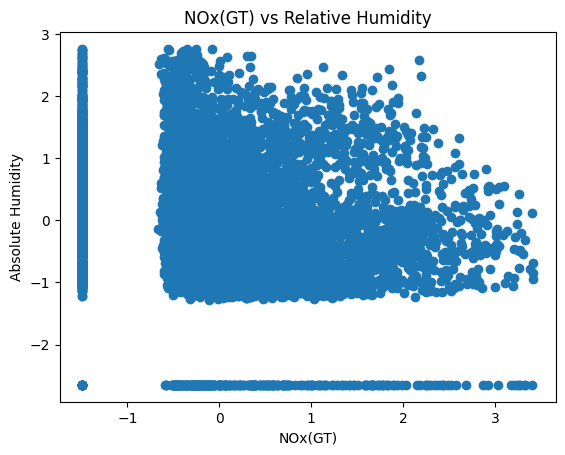

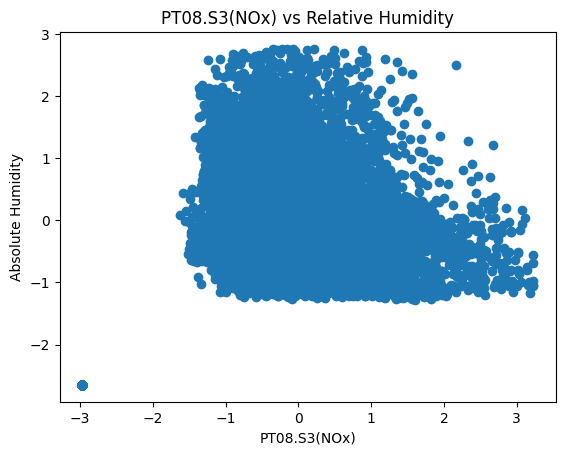

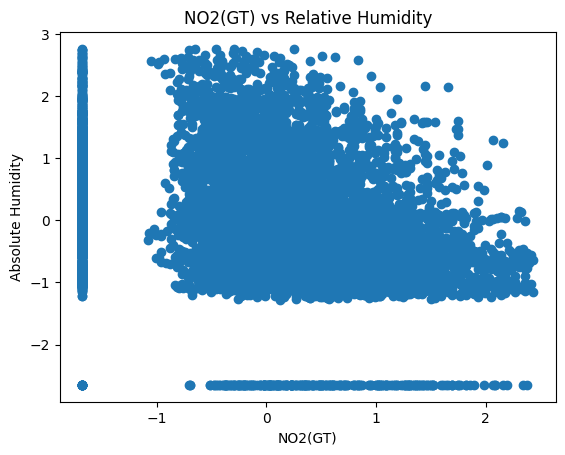

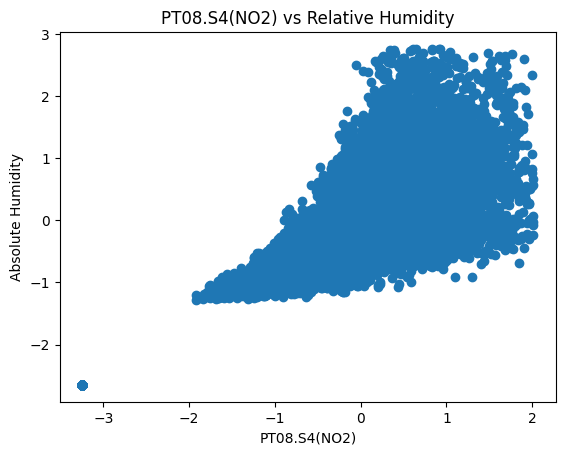

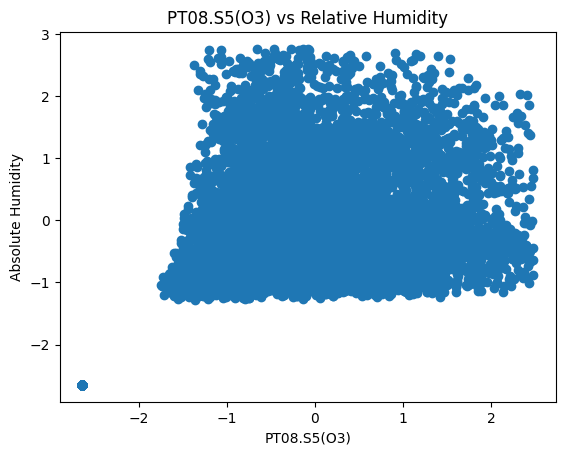

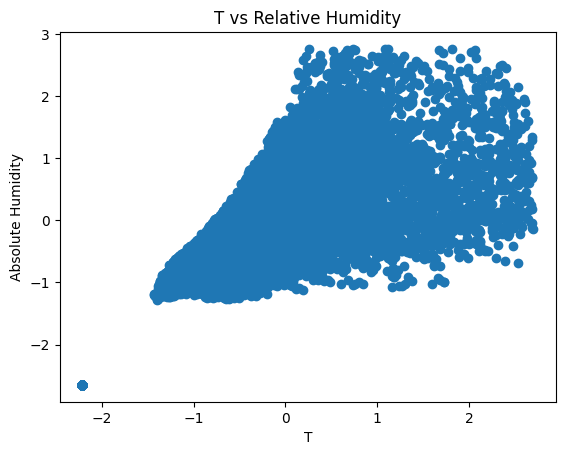

In [62]:
for i in range(len(X.columns)-2):
    scatter_plot_AH(X.columns[i])

### Splitting the dataset

In [64]:
y = X['AH']
X = X.drop('AH',axis=1)

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=6,shuffle=True)

### Training the data with Machine Learning Model

R² Score (r2_score): Measures how well the model fits the data (closer to 1 is better).

Mean Squared Error (mean_squared_error): Measures the average squared difference between actual and predicted values.

Mean Absolute Error (mean_absolute_error): Measures the average absolute difference.

Accuracy: Approximate accuracy percentage derived from R² Score × 100.


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

# Decision Tree Regressor Model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

# Evaluation Metrics for Linear Regression
lr_r2 = r2_score(y_test, lr_y_pred)
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_accuracy = lr_r2 * 100  # Accuracy as percentage

# Evaluation Metrics for Decision Tree Regressor
dt_r2 = r2_score(y_test, dt_y_pred)
dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_accuracy = dt_r2 * 100  # Accuracy as percentage

# Printing the results
print("Linear Regression:")
print(f'  Mean Squared Error: {lr_mse}')
print(f'  Mean Absolute Error: {lr_mae}')
print(f'  R² Score: {lr_r2}')
print(f'  Accuracy: {lr_accuracy:.2f}%')

print("\nDecision Tree Regressor:")
print(f'  Mean Squared Error: {dt_mse}')
print(f'  Mean Absolute Error: {dt_mae}')
print(f'  R² Score: {dt_r2}')
print(f'  Accuracy: {dt_accuracy:.2f}%')


Linear Regression:
  Mean Squared Error: 0.1369023802410222
  Mean Absolute Error: 0.2861624256205501
  R² Score: 0.8573707710965397
  Accuracy: 85.74%

Decision Tree Regressor:
  Mean Squared Error: 0.005063366181486313
  Mean Absolute Error: 0.04325857433586741
  R² Score: 0.9947248249968349
  Accuracy: 99.47%


In [ ]:
import pandas as pd
import numpy as np

# Assuming your trained Linear Regression model is named 'lr_model'
# and your independent variables are in a DataFrame called 'X_test'

# Example values for independent variables for Mumbai
new_data = {'CO(GT)': [2.6], 'PT08.S1(CO)': [1360.0], 'NMHC(GT)': [150.0],
            'C6H6(GT)': [11.9], 'PT08.S2(NMHC)': [1046.0], 'NOx(GT)': [166.0],
            'PT08.S3(NOx)': [1056.0], 'NO2(GT)': [113.0], 'PT08.S4(NO2)': [1692.0],
            'PT08.S5(O3)': [1268.0], 'T': [29.3], 'RH': [48.9], 'Unnamed: 0': [0]}

# Creating a DataFrame for the new data
new_data_df = pd.DataFrame(new_data)

# Reseting index to match model training data structure
X_test = X_test.reset_index(drop=True)

# Adding 'Unnamed: 0' column to new_data_df to match X_test columns
new_data_df = new_data_df[X_test.columns]

# Predicting AQI using the trained model
predicted_aqi = lr_model.predict(new_data_df)

# Printing the predicted AQI
print("Predicted AQI for Mumbai:", predicted_aqi[0])

Predicted AQI for Mumbai: 1.8625363449209829
